In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline

train=pd.read_csv("D:/bank-full.csv",delimiter=';')

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
categorical = train.dtypes[train.dtypes == "object"].index

print(categorical)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [6]:
train.apply(lambda x:sum(x.isnull()))

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

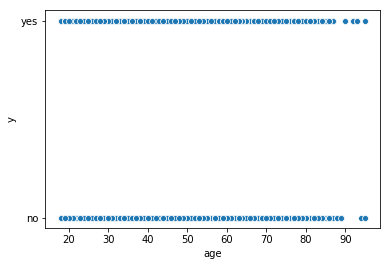

In [7]:
#confront integers 
#first age
#scatter plot
ax=sns.scatterplot(x="age",y="y",data=train)

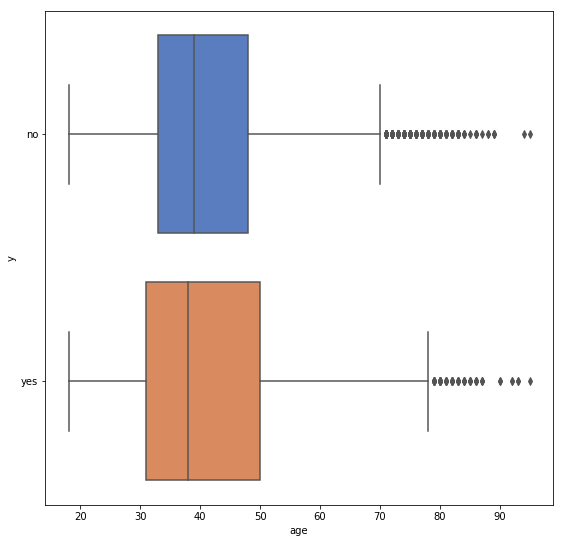

In [8]:
#boxplot
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
g = sns.boxplot(x="age", y="y", 
                    data=train, palette="muted", ax=ax1)

In [9]:
train.drop(train['age'][train['age']>87].index,inplace=True)

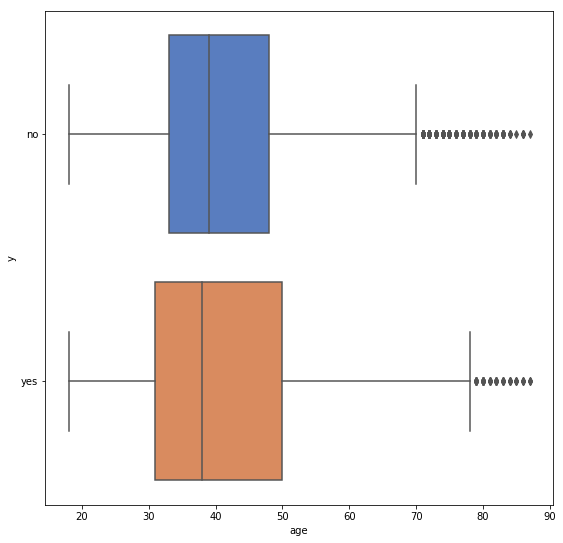

In [10]:
#boxplot
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
g = sns.boxplot(x="age", y="y", 
                    data=train, palette="muted", ax=ax1)

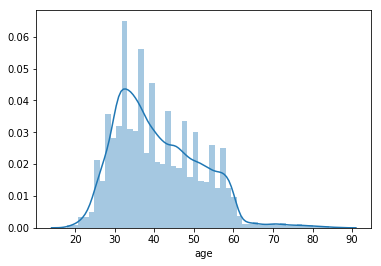

In [11]:
#for normalization
sns.distplot(train["age"])

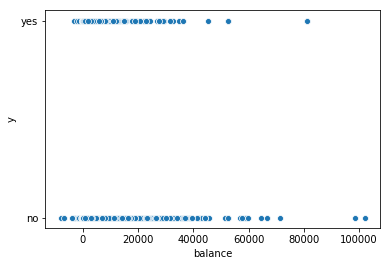

In [12]:
# second balance
ax=sns.scatterplot(x="balance",y="y",data=train)

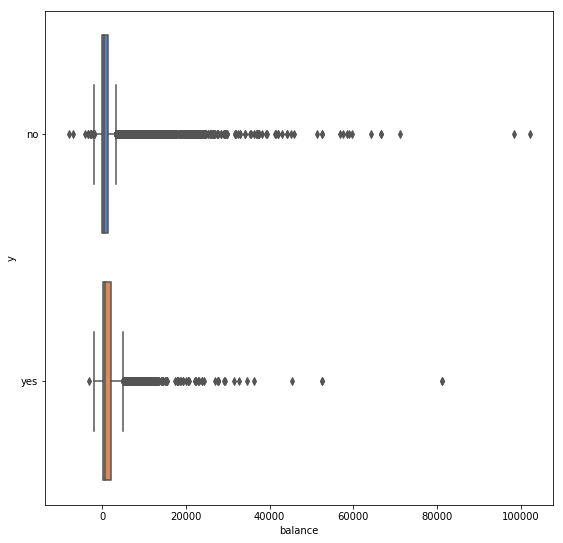

In [13]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
g = sns.boxplot(x="balance", y="y", 
                    data=train, palette="muted", ax=ax1)

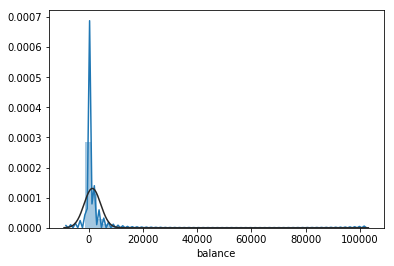

In [14]:
sns.distplot(train["balance"],fit=norm)

In [15]:
train.drop(train['age'][train['balance']>70000].index,inplace=True)

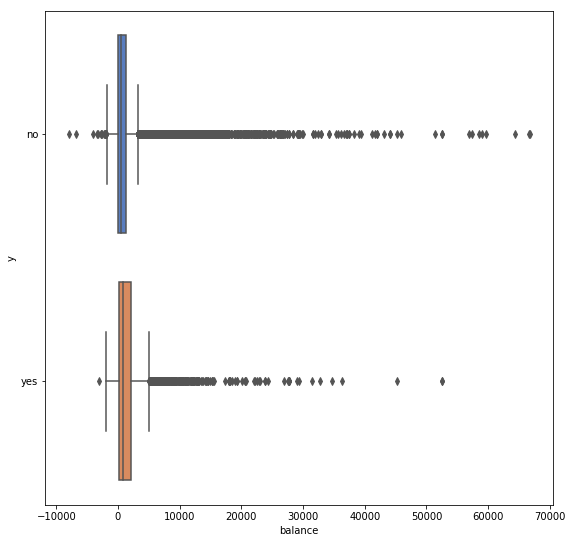

In [16]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
g = sns.boxplot(x="balance", y="y", 
                    data=train, palette="muted", ax=ax1)

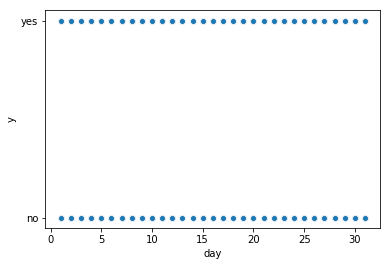

In [17]:
# third day
ax=sns.scatterplot(x="day",y="y",data=train)

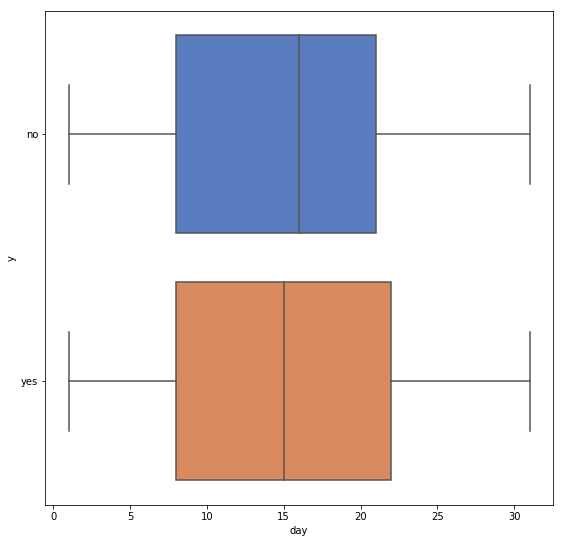

In [18]:
#boxplot
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
g = sns.boxplot(x="day", y="y", 
                    data=train, palette="muted", ax=ax1)

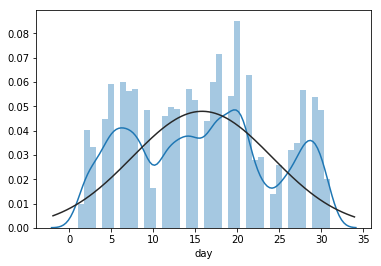

In [19]:
#no outliners
sns.distplot(train["day"],fit=norm)

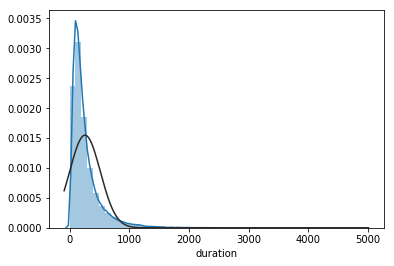

In [20]:
sns.distplot(train["duration"],fit=norm)

In [21]:
#skewed
#how to apply log tranform
#ibu"].apply(np.log).hist()

In [22]:
#scaling it converting in sec
train["duration"].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556], dtype=int64)

In [23]:
train["duration"]=train["duration"]/3600

In [24]:
train["duration"].unique()

array([0.0725    , 0.04194444, 0.02111111, ..., 0.36055556, 0.34611111,
       0.43222222])

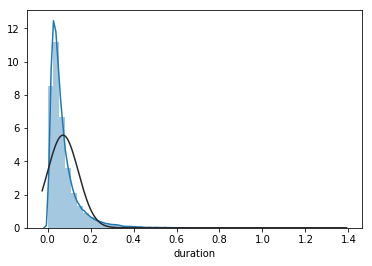

In [25]:

sns.distplot(train["duration"],fit=norm)

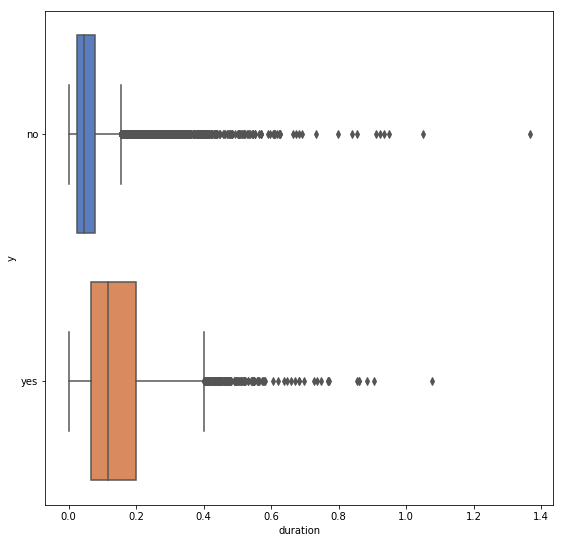

In [26]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
g = sns.boxplot(x="duration", y="y", 
                    data=train, palette="muted", ax=ax1)

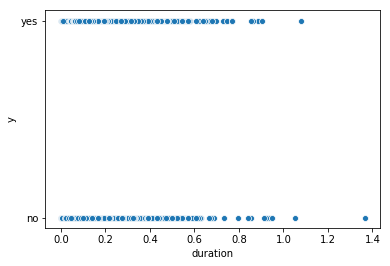

In [27]:
ax=sns.scatterplot(x="duration",y="y",data=train)

In [28]:
train.drop(train['duration'][train['duration']>0.9].index,inplace=True)

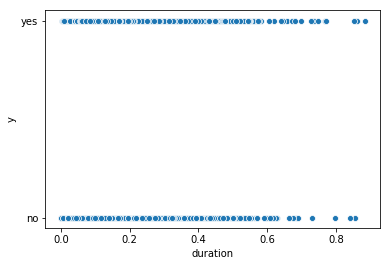

In [29]:
ax=sns.scatterplot(x="duration",y="y",data=train)

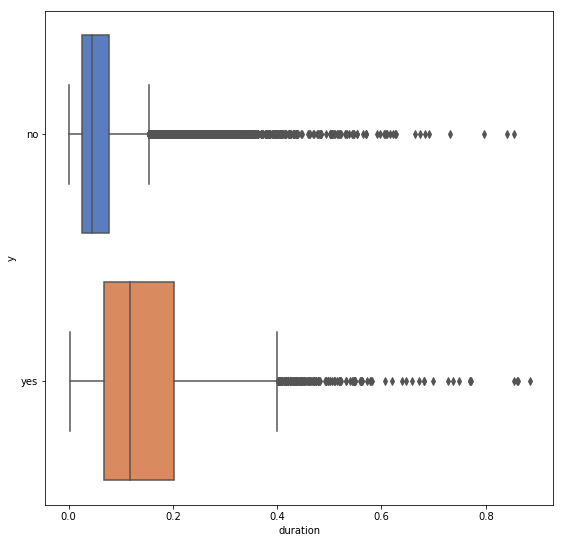

In [30]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
g = sns.boxplot(x="duration", y="y", 
                    data=train, palette="muted", ax=ax1)

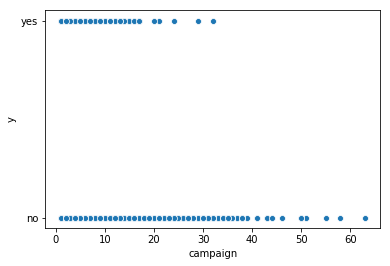

In [31]:
ax=sns.scatterplot(x="campaign",y="y",data=train)

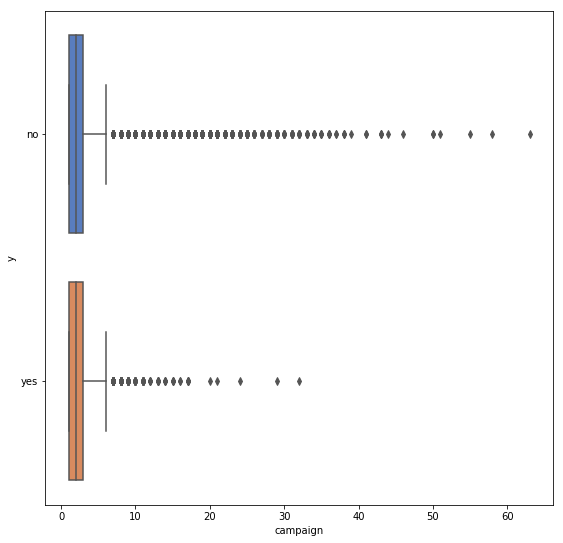

In [32]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
g = sns.boxplot(x="campaign", y="y", 
                    data=train, palette="muted", ax=ax1)

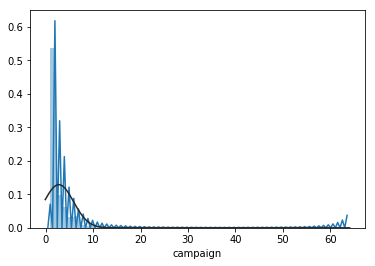

In [33]:
sns.distplot(train["campaign"],fit=norm)

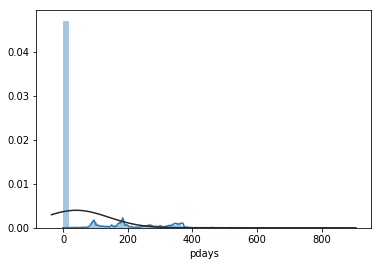

In [34]:
sns.distplot(train["pdays"],fit=norm)

In [35]:
train["pdays"].unique()
#u cannot plot boxplot for pdays as its really difficult to imagine such thing neither histogram

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000214CAAE9A58>]],
      dtype=object)

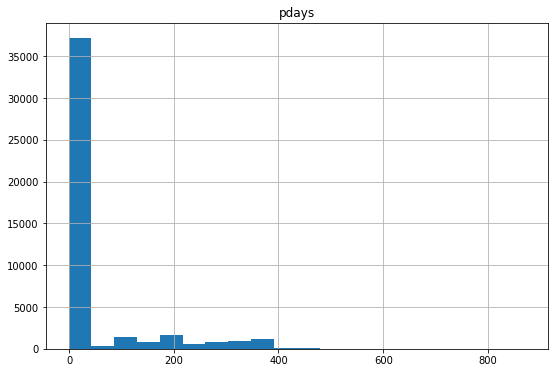

In [36]:
train.hist(column='pdays', figsize=(9,6), bins=20) 

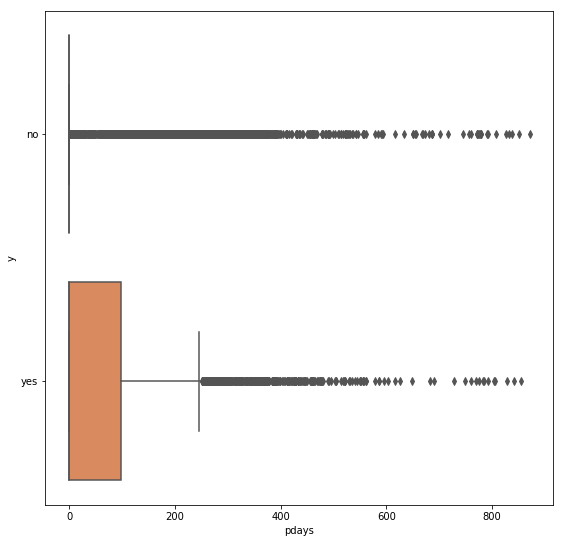

In [37]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
g = sns.boxplot(x="pdays", y="y", 
                    data=train, palette="muted", ax=ax1)

In [38]:
# as such no outliners just doing the thing as the values are either 0 aur graeter than 0 so converting in categorical variable
train["pdays"][train["pdays"]>=0]=1

D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
train["pdays"][train["pdays"]!=1]=0

D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
train["pdays"].unique

<bound method Series.unique of 0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
45181    1
45182    1
45183    1
45184    1
45185    1
45186    1
45187    0
45188    1
45189    1
45190    1
45191    1
45192    0
45193    1
45194    1
45195    1
45196    0
45197    0
45198    0
45199    1
45200    0
45201    1
45202    0
45203    0
45204    1
45205    0
45206    0
45207    0
45208    1
45209    0
45210    1
Name: pdays, Length: 45184, dtype: int64>

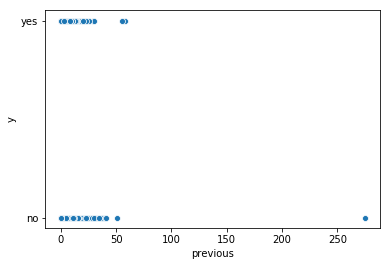

In [41]:
ax=sns.scatterplot(x="previous",y="y",data=train)

In [42]:
train.drop(train['duration'][train['previous']>250].index,inplace=True)

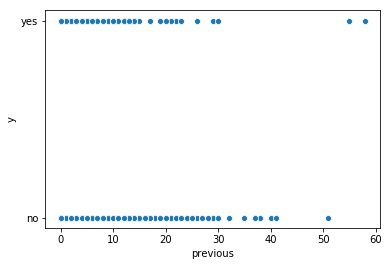

In [43]:
ax=sns.scatterplot(x="previous",y="y",data=train)

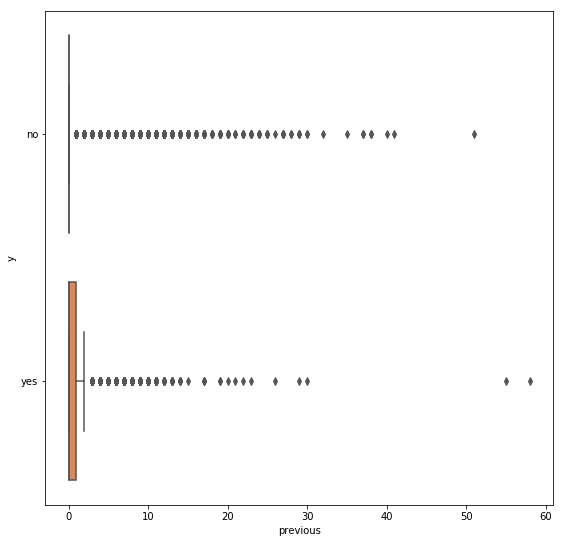

In [44]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
g = sns.boxplot(x="previous", y="y",
                    data=train, palette="muted", ax=ax1)

In [45]:
# tackleing categorical variables
#first loan as home or personal tend to just having loan
train["has_loan"]='no'

In [46]:
train["has_loan"][train["housing"]=='yes']='yes'
train["has_loan"][train["loan"]=='yes']='yes'

D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
train["has_loan"].unique

<bound method Series.unique of 0        yes
1        yes
2        yes
3        yes
4         no
5        yes
6        yes
7        yes
8        yes
9        yes
10       yes
11       yes
12       yes
13       yes
14       yes
15       yes
16       yes
17       yes
18       yes
19       yes
20       yes
21       yes
22       yes
23       yes
24       yes
25       yes
26       yes
27       yes
28       yes
29       yes
        ... 
45181     no
45182     no
45183     no
45184     no
45185    yes
45186     no
45187    yes
45188    yes
45189     no
45190     no
45191    yes
45192     no
45193     no
45194    yes
45195     no
45196     no
45197    yes
45198     no
45199    yes
45200    yes
45201     no
45202     no
45203     no
45204     no
45205    yes
45206     no
45207     no
45208     no
45209     no
45210     no
Name: has_loan, Length: 45183, dtype: object>

In [48]:
#assuming we are creating model in jan of next year
replaceMap = {'month':{'jan':1,'feb':2,
                       'mar':3,'apr':4,
                       'may':5,'june':6,
                       'july':7,'aug':8,
                       'sep':9,'oct':10,
                       'nov':11,'dec':12}}

In [49]:
train_copy1 = train.copy()

train.replace(replaceMap, inplace=True)

train["month"].unique

<bound method Series.unique of 0         5
1         5
2         5
3         5
4         5
5         5
6         5
7         5
8         5
9         5
10        5
11        5
12        5
13        5
14        5
15        5
16        5
17        5
18        5
19        5
20        5
21        5
22        5
23        5
24        5
25        5
26        5
27        5
28        5
29        5
         ..
45181    11
45182    11
45183    11
45184    11
45185    11
45186    11
45187    11
45188    11
45189    11
45190    11
45191    11
45192    11
45193    11
45194    11
45195    11
45196    11
45197    11
45198    11
45199    11
45200    11
45201    11
45202    11
45203    11
45204    11
45205    11
45206    11
45207    11
45208    11
45209    11
45210    11
Name: month, Length: 45183, dtype: object>

In [50]:
train['job'].value_counts()

blue-collar      9730
management       9454
technician       7596
admin.           5170
services         4153
retired          2247
self-employed    1577
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [51]:
train['education'].value_counts()

secondary    23192
tertiary     13293
primary       6845
unknown       1853
Name: education, dtype: int64

In [52]:
train['job'][train['education']=='unknown'].value_counts()

blue-collar      454
technician       242
management       242
admin.           171
student          163
services         150
unknown          127
retired          115
entrepreneur      76
housemaid         45
self-employed     39
unemployed        29
Name: job, dtype: int64

In [53]:
train['education'][train['job']=='unknown'].value_counts()

unknown      127
secondary     71
primary       51
tertiary      39
Name: education, dtype: int64

In [54]:
train["job"].value_counts()

blue-collar      9730
management       9454
technician       7596
admin.           5170
services         4153
retired          2247
self-employed    1577
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [55]:
def f(x):
  if x['job'] == 'unknown' and ( x['education'] == 'tertiary' ): return 'management'
  else: return x['job']

train['job'] = train.apply(f, axis=1)


def g(x):
  if x['job'] == 'unknown' and (x['education'] == 'secondary' or x['education'] == 'primary' ): return 'blue-collar'
  else: return x['job']

train['job'] = train.apply(g, axis=1)


In [56]:
train["job"].value_counts()

blue-collar      9852
management       9493
technician       7596
admin.           5170
services         4153
retired          2247
self-employed    1577
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           127
Name: job, dtype: int64

In [57]:
train['balance'][train['balance']>50000].value_counts()

52587    2
56831    1
66653    1
52527    1
57435    1
59649    1
51439    1
64343    1
58932    1
52499    1
66721    1
58544    1
Name: balance, dtype: int64

In [59]:
train["job"].value_counts()

blue-collar      9852
management       9493
technician       7596
admin.           5170
services         4153
retired          2247
self-employed    1577
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           127
Name: job, dtype: int64

In [61]:
train["job"].value_counts()

blue-collar      9852
management       9493
technician       7596
admin.           5170
services         4153
retired          2247
self-employed    1577
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           127
Name: job, dtype: int64

In [62]:
train['job'][train['job']=='admin.']='management'

D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
train['job'][train['job']=='entrepreneur']='self-employed'

D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
train['job'][train['job']=='services']='blue-collar'

D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
train['job'][train['job']=='technician']='blue-collar'

D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
train['job'].unique()

array(['management', 'blue-collar', 'self-employed', 'unknown', 'retired',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [67]:
train['job'][train['job']=='student']='unemployed'

D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
train['job'][train['job']=='housemaid']='unemployed'

D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
train['job'][train['job']=='retired']='unemployed'

D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
train['job'].unique()

array(['management', 'blue-collar', 'self-employed', 'unknown',
       'unemployed'], dtype=object)

In [71]:
train['marital'][train['marital']=='divorced']='single'

D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
train['marital'].unique()

array(['married', 'single'], dtype=object)

In [73]:
from sklearn.preprocessing import LabelBinarizer

lb_bin = LabelBinarizer()

lb_results = lb_bin.fit_transform(train['job'])

lb_results_df = pd.DataFrame(lb_results, columns=lb_bin.classes_)

lb_results_df.head(10)
train['job']=lb_results_df

In [74]:
train['marital'][train['marital']=='married']=1
train['marital'][train['marital']=='single']=0

D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [75]:


lb_bin1 = LabelBinarizer()

lb_results1 = lb_bin1.fit_transform(train['education'])

lb_results_df1 = pd.DataFrame(lb_results1, columns=lb_bin1.classes_)

lb_results_df1.head(10)
train["education"]=lb_results_df1

In [76]:
train["education"].value_counts()

0.0    38311
1.0     6844
Name: education, dtype: int64

In [77]:
train["education"][train["education"]!=1.0]=0.0

D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
train["education"].unique

<bound method Series.unique of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        1.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       1.0
16       0.0
17       1.0
18       1.0
19       0.0
20       0.0
21       0.0
22       1.0
23       0.0
24       1.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
45181    0.0
45182    0.0
45183    0.0
45184    0.0
45185    0.0
45186    0.0
45187    0.0
45188    0.0
45189    0.0
45190    0.0
45191    0.0
45192    0.0
45193    0.0
45194    0.0
45195    0.0
45196    0.0
45197    0.0
45198    0.0
45199    0.0
45200    0.0
45201    0.0
45202    0.0
45203    0.0
45204    0.0
45205    0.0
45206    0.0
45207    0.0
45208    0.0
45209    0.0
45210    0.0
Name: education, Length: 45183, dtype: float64>

In [79]:
train['default'][train['default']=='yes']=1
train['default'][train['default']=='no']=0

D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [80]:
train['has_loan'][train['has_loan']=='yes']=1
train['has_loan'][train['has_loan']=='no']=0

D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
train['has_loan'].unique()

array([1, 0], dtype=object)

In [82]:
train['balance'].unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353], dtype=int64)

In [83]:
train['education'].unique()

array([0., 1.])

In [84]:
train["default"].unique()

array([0, 1], dtype=object)

In [85]:
train['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [86]:
train['job'].unique

<bound method Series.unique of 0        0.0
1        1.0
2        0.0
3        1.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        1.0
10       0.0
11       0.0
12       1.0
13       1.0
14       1.0
15       0.0
16       0.0
17       1.0
18       0.0
19       1.0
20       1.0
21       0.0
22       1.0
23       1.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       1.0
        ... 
45181    1.0
45182    0.0
45183    NaN
45184    NaN
45185    NaN
45186    NaN
45187    NaN
45188    NaN
45189    NaN
45190    NaN
45191    NaN
45192    NaN
45193    NaN
45194    NaN
45195    NaN
45196    NaN
45197    NaN
45198    NaN
45199    NaN
45200    NaN
45201    NaN
45202    NaN
45203    NaN
45204    NaN
45205    NaN
45206    NaN
45207    NaN
45208    NaN
45209    NaN
45210    NaN
Name: job, Length: 45183, dtype: float64>

In [87]:
train['job'][train['job']!=1]=0
train['job'].unique()

D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([0., 1.])

In [88]:
train['duration'].unique()

array([0.0725    , 0.04194444, 0.02111111, ..., 0.36055556, 0.34611111,
       0.43222222])

In [89]:
train['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [90]:
train['pdays'].unique()

array([0, 1], dtype=int64)

In [91]:
train['previous'].unique()

array([ 0,  3,  1,  4,  2, 11, 16,  6,  5, 10, 12,  7, 18,  9, 21,  8, 14,
       15, 26, 37, 13, 25, 20, 27, 17, 23, 38, 29, 24, 51, 22, 19, 30, 58,
       28, 32, 40, 55, 35, 41], dtype=int64)

In [92]:
train['month'].unique()

array([5, 'jun', 'jul', 8, 10, 11, 12, 1, 2, 3, 4, 9], dtype=object)

In [93]:
train["y"].unique()

array(['no', 'yes'], dtype=object)

In [96]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import KFold
test = train
features_forest = train[["age","job", "marital","education", "default", "balance","has_loan","day","duration","campaign","pdays","previous"]]
test_features = test[["age","job", "marital","education", "default", "balance","has_loan","day","duration","campaign","pdays","previous"]]
target = train["y"]
num_folds = 10
num_instances = train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'





In [99]:
features_forest.describe()

,age,job,education,balance,day,duration,campaign,pdays,previous
count,45183.000000,45183.000000,45183.000000,45183.000000,45183.000000,45183.000000,45183.000000,45183.000000,45183.000000
mean,40.917115,0.480158,0.151473,1353.026780,15.807538,0.071528,2.763893,0.182569,0.574021
std,10.579419,0.499612,0.358513,2907.230449,8.321553,0.070374,3.098037,0.386317,1.907726
min,18.000000,0.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,72.000000,8.000000,0.028611,1.000000,0.000000,0.000000
50%,39.000000,0.000000,0.000000,448.000000,16.000000,0.050000,2.000000,0.000000,0.000000
75%,48.000000,1.000000,0.000000,1428.000000,21.000000,0.088611,3.000000,0.000000,0.000000
max,87.000000,1.000000,1.000000,66721.000000,31.000000,0.884167,63.000000,1.000000,58.000000


In [110]:
features_forest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45183 entries, 0 to 45210
Data columns (total 12 columns):
age          45183 non-null int64
job          45183 non-null float64
marital      45183 non-null object
education    45183 non-null float64
default      45183 non-null object
balance      45183 non-null int64
has_loan     45183 non-null object
day          45183 non-null int64
duration     45183 non-null float64
campaign     45183 non-null int64
pdays        45183 non-null int64
previous     45183 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 4.5+ MB


In [111]:
features_forest.has_loan.unique()

array([1, 0], dtype=object)

In [112]:
features_forest.default.unique()

array([0, 1], dtype=object)

In [113]:
features_forest.marital.unique()

array([1, 0], dtype=object)

In [114]:
train["y"].unique()

array(['no', 'yes'], dtype=object)

In [101]:
kfold = KFold(n_splits=num_folds, random_state=seed)
# Print the score of the fitted random forest
print(forest.score(features_forest, target))

#Cross validation
results1 = model_selection.cross_val_score(forest, features_forest, 
                                            target, cv=kfold,
                                            scoring=scoring1)

#Print cross validation score
print("Accuracy")
print(results1.mean(), results1.std())

results2 = model_selection.cross_val_score(forest, features_forest, target, 
                                            cv=kfold,scoring=scoring2)

#Print AUC
print("AUC score")
print(results2.mean(), results2.std())

# Compute predictions on our test set features then print the length of the prediction vector
test_features = test[["age", "job", "marital", "education", "default", "balance","has_loan","day","duration","campaign",
                        "pdays","previous"]].values
pred_forest = forest.predict(test_features)
print(len(pred_forest))

print(forest.feature_importances_)

0.8377708430161787
Accuracy
0.8020005395545502 0.08297844853793791
AUC score
0.8665343923018414 0.09467159027902668
45183
[0.07038158 0.01503974 0.01137191 0.00476925 0.00130401 0.05943836
 0.09498023 0.03859245 0.5748244  0.02932496 0.0459577  0.05401542]


In [102]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(y_test, y_pred)
y_pred = forest.predict(features_forest)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train["y"], y_pred)
print(confusion_matrix)

[[33265  6640]
 [  690  4588]]


In [103]:
from sklearn.metrics import classification_report
print(classification_report(train["y"], y_pred))

              precision    recall  f1-score   support

          no       0.98      0.83      0.90     39905
         yes       0.41      0.87      0.56      5278

    accuracy                           0.84     45183
   macro avg       0.69      0.85      0.73     45183
weighted avg       0.91      0.84      0.86     45183



In [131]:
train["y"][train["y"]=='yes']=1

D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
train["y"].unique()

array(['no', 'yes'], dtype=object)

In [107]:
train["y"].unique()

array(['no', 'yes'], dtype=object)

In [109]:
train["y"][train["y"]=='no']=0

D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [111]:
train["y"][train["y"]!=0]=1

D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
train["y"].unique()

array([0, 1], dtype=object)

In [117]:
 train["y"]=train["y"].astype('int')

In [118]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(forest
                                                        ,X = features_forest
                                                        ,y = train["y"]
                                                        ,cv = 5
                                                        ,scoring = 'recall'
                                                        ,train_sizes = np.linspace(0.1, 1, num=5)
                                                        #,train_sizes =[200,400,600,800,1000]
                                                       )
#neg_mean_squared_error

D:\Ananconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Ananconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [119]:
print(train_scores)

[[0.         1.         1.         1.         1.        ]
 [0.         0.98681319 0.98839907 0.98839907 0.98839907]
 [0.97643979 0.9782197  0.93669986 0.98146129 0.98146129]
 [0.82984658 0.96582985 0.85416667 0.86421791 0.93470546]
 [0.85078162 0.89388915 0.86451919 0.87165522 0.87020369]]


In [120]:
print(train_sizes)

[ 3614 11747 19880 28013 36146]


In [121]:
print(test_scores)

[[0.         0.11647727 0.10700758 0.02369668 0.01895735]
 [0.         0.42234848 0.36458333 0.12417062 0.13080569]
 [0.30018939 0.35606061 0.40435606 0.15260664 0.17535545]
 [0.76893939 0.39393939 0.48011364 0.62369668 0.13649289]
 [0.75094697 0.60984848 0.69602273 0.70047393 0.86255924]]


[0.8        0.79040208 0.97085638 0.88975329 0.87020977]
[0.05322778 0.20838162 0.27771363 0.4806364  0.72397027]


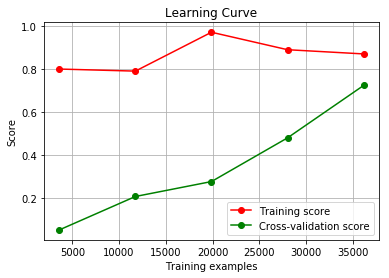

In [122]:
    plt.figure()
    #ylim=None
    plt.ylim = (-1,1)
    plt.title('Learning Curve')
    #if ylim is not None:
     #   plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    #plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
     #                train_scores_mean + train_scores_std, alpha=0.1,
      #               color="r")
    #plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
     #                test_scores_mean + test_scores_std, alpha=0.1, color="g")
    print(train_scores_mean)
    print(test_scores_mean)
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

In [131]:
train["y"].unique()

array([0, 1], dtype=int64)

In [132]:

from time import time
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
t0 = time()

linClf = LinearSVC(C=1)
# loss="hinge"
linClf.fit(features_forest, train.y.astype(int))

print("Training time:", round(time()-t0, 3), "s")
t1 = time()

pred = linClf.predict(features_forest)

print("Prediction time:", round(time()-t1, 3), "s")

accuracy = accuracy_score(train.y.astype(int), pred)
print(accuracy)

Training time: 11.522 s
Prediction time: 0.066 s
0.8021822366819379


D:\Ananconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [133]:
from sklearn.metrics import classification_report
y_pred = linClf.predict(features_forest)
print(classification_report(train.y.astype(int), y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88     39905
           1       0.28      0.45      0.35      5278

    accuracy                           0.80     45183
   macro avg       0.60      0.65      0.62     45183
weighted avg       0.85      0.80      0.82     45183



In [143]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print('Precisiom=n Score')
precision_score(train["y"], pred)



Precisiom=n Score


0.28229835831548894

In [144]:
print('Recall Score')
recall_score(train["y"], pred)

Recall Score


0.4496021220159151

In [ ]:
from sklearn.svm import SVC
clf2 = SVC(kernel="poly",degree=3,C=0.001)
t0 = time()
clf2.fit(features_forest, train.y.astype(int))
print("Training time:", round(time()-t0, 3), "s")
t1 = time()
pred = clf2.predict(X_train)
print("Prediction time:", round(time()-t1, 3), "s")
accuracy = accuracy_score(y_train, pred)
print(accuracy)

D:\Ananconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
